<img src="https://assets.holidaycottages.co.uk/assets/images/blog/PixelBritain/Design_V1-03_Borough%20Market.gif" style="text-align:center;">

<h1 style="text-align:center;">London Real Estate - Rent Analysis</h1>
<h3 style="text-align:center;">Find the flat that better fit your needs</h3>
<h4 style="text-align:center;">Location based Clustering</h4>
<h5 style="text-align:center;">30th November 2019</h5>

---

<h2 style="text-align:left;"><img src="download.png" height="75" width="75">   Federico Sciuca</h2>
<h4 style="text-align:left;"><a href="https://www.linkedin.com/in/federico-sciuca/"><img src="https://cdn2.iconfinder.com/data/icons/popular-social-media-flat/48/Popular_Social_Media-22-512.png" style="text-align:left; position: relative; top: 15px; left: 1px;" height="45" width="45">   Contact me on LinkedIn</a></h4>

---

<h2 style="text-align:center;">Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Executive Summary</a>

2. <a href="#item2">Introduction and Business problem presentation</a>

3. <a href="#item3">Methodology</a>

4. <a href="#item4">Results</a>

5. <a href="#item5">Let's start the analysis!</a>
    
    1. <a href="#item5">Libraries installation and data collection</a>
    2. <a href="#item6">Data Exploration</a>
    3. <a href="#item7">Data Manipulation</a>
    5. <a href="#item8">Foursquare API - Find the most common venues near the flat</a>
    6. <a href="#item9">Clustering using K-Means Algorithm</a>
    7. <a href="#item10">London Clusters Distribution Map</a>
    8. <a href="#item11">Housing market - heating map</a>
    

6. <a href="#item12">The Final Input: find your best offer!</a>

7. <a href="#item13">Conclusion</a>
</font>
</div>

<a id='item1'></a>

## Executive Summary

This is not the end of the study path but just the start!  
As an analyst, I'm interested in finding new insight to understand a certain phenomenon but as a marketer, I also have a client-centric vision of the businesses and one of the powerful ways to make business is implementing solutions that permit the user to make his/her decision fast and easy.  
  
Everything that saves time and efforts to the user has a great value on the market.  
  
__*Empowering people to make an informed decision is a great way to improve the world we're living in.*__

  <a id='item2'></a>

## Introduction and Business problem presentation

We could identify 3 main reasons why a flat doesn't fit the customer needs:  
  
 - The flat looks old and stale  
 - The neighbour hasn't the expected commodities nearby  
 - The price is too high for that particular flat or out of budget    
      
Our goal with this Notebook is to have a systematic way to analyze the offers posted by RightMove.co.uk to produce a map of the best opportunities in the city.  
If you are looking for a new flat and you like your actual neighbour, we can provide you with a list of all the opportunity on the market.  
  
For this project, I'm going to create a simple software that scrape the website RightMove to collect an updated list of flat for rent, analyze each offer using Foursquare and cluster them to divide the housing market in 20 groups with similar neighbours.

<img src="https://www.trzcacak.rs/myfile/detail/152-1527787_international-appe-rotation-london-skyline-silhouette-png.png" style="text-align:center;">

  <a id='item3'></a>

## Methodology

For this particular analysis, we are going to collect updated data from __RightMove.co.uk__.  
  
To do so, I decided to spend time developing a __web scraping__ application using __*Beautiful Soup 4*__, but then I discovered a repository on __GitHub__ offered by __*toby-p*__ and available <a href="https://github.com/toby-p/rightmove_webscraper.py"><img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" style="text-align:left; position: relative; top: 5px; left: 1px;" height="25" width="25"> here</a>, that's provide a easy way to scrape RightMove!  
  
This script collect the following data:  
  
 - price  
 - type  
 - address  
 - url  
 - agent_url  
 - postcode  
 - number_bedrooms  
 - search_date  
   
   
A record will look like the following:  
  
| id | price | type | address | url | agent_url | postcode | number_bedrooms | search_date |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 0 | 2210.0 | 2 bedroom terraced house | Lifford Street, SW15 |  http://www.rightmove.co.uk/property-to-rent/pr... | http://www.rightmove.co.uk/estate-agents/agent... | SW15 | 2.0 | 2019-11-30 20:53:29.597998 |   
  
__The address__ is in the format *"Street, City, Postcode"* and is an __unstructured field__ but for our purpose, we can leave as it is. Instead, the __PostCode__ present a *"limited"* format because we have the first two/three digits only. __This is not accurate enough to collect meaningful data about the venues around the flat__.  
  
In order __to solve this problem__, we are going to use <a href="https://opencagedata.com/">OpenCage Geocoder API</a> to *look up coordinates from a postal address*. This is a case when an unstructured field becomes helpful.  
  
To __associate each rent offer to a District__, we are going to __join the data table with a second dataset__ presenting two columns:  
  
 - District Name  
 - PostCode  
  
This dataset had been created __scraping a Wikipedia Table__ (available<a href="https://en.wikipedia.org/wiki/London_postal_district"> here</a>) with the data we need for the exercise.  

When the data are collected and merged into a single data frame, we are going to __cluster__ them using the __K-Means algorithm__ to divide the market into *20 different clusters*.
To have an idea of the distribution on the territory of the offers, I plotted __2 meaningful maps__:  
  
 - Cluster map: this map shows the distribution of the clusters using colours to identify each cluster.  
 - Heating map: this map shows the areas with a higher number of offers.  
  
To better understand the market, I decided to develop some __bar plots__ to easily identify the __average price for a studio flat, 1 bedroom flat and 2 bedroom flat grouped by the District Name__.  
I've also plotted a __correlation matrix__ to identify if there are strong unexpected correlations between features in the dataset. 
  
Finally, __I decided to conclude the project by asking the user to insert some data:__  
  
 - Your address: this input is used to analyze the neighbourhood you are living in and to use this information to find the cluster you belong to.  
 - The number of bedrooms you are looking for: this input is used to filter the results of the cluster you belong to.  
  
__*This part of the analysis has as output a data frame with a list of filtered results based on your preference.*__

<a id='item4'></a>

## Results

As expected, the __price of a flat can't be forecast based on the venues around it only__ and there is, of course, a strong correlation between the number of bedrooms and price. *Nevertheless, is possible to develop a prediction model to take in consideration not only the characteristics of the flat but also the District the flat belongs to and the presence of some key venues near the flat.*  
An example of __key factors__ could be the presence of __supermarkets with high reputation__, __a public transport stop__, __schools or Universities__, __Hospital__. The __correlation__ between price and these categories __is low but still important to the final users__.  
  
The __goal of this notebook__ is to provide to everyone a way to scrape the housing market and __identify the best offers that fit the user's personal needs__. Providing an ideal address and the number of bedrooms the user is looking for, he/she can easily understand which area of London is the best for his/her next step.

<a id='item5'></a>

---
<h2 style="text-align:center;">Let's Start!</h2>  


## Libraries Installation

First of all we need to install all the libraries we need for the analysis.

In [1]:
# Get lxlm
!conda install -c anaconda lxml -y

# Install requests library
!conda install -c anaconda requests -y

# Install geopy library
!conda install -c conda-forge geopy --yes 

# Install folium library
!conda install -c conda-forge folium=0.5.0 --yes

# Install rightmove-webscraper (https://github.com/toby-p/rightmove_webscraper.py)
!pip install -U rightmove-webscraper

# Install opencage
!pip install opencage

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numpy-base-1.15.4          |   py36h81de0dd_0         4.2 MB  anaconda
    numpy-1.15.4               |   py36h1d66e8a_0          35 KB  anaconda
    certifi-2019.9.11          |           py36_0         154 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    lxml-4.3.0                 |   py36hefd8a0e_0         1.5 MB  anaconda
    mkl_fft-1.0.6              |   py36h7dd41cf_0         150 KB  anaconda
    blas-1.0                   |              mkl           6 KB  anaconda
  

Let's import the libraries into the Jupyter Notebook

In [2]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import requests
import lxml
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import folium # plotting library
from sklearn.cluster import KMeans

from opencage.geocoder import OpenCageGeocode
from pprint import pprint

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Run the rightmove_webscraping to collect data  
  
Note: rightmove_webscraper works with an old version of numpy. For this reason I'll use rightmove_webscraper first and then I'll reinstall the last version which works without conflicts with seaborn.

In [3]:
from rightmove_webscraper import RightmoveData

url = "https://www.rightmove.co.uk/property-to-rent/find.html?searchType=RENT&locationIdentifier=REGION%5E87490&insId=1&radius=0.0&minPrice=&maxPrice=&minBedrooms=&maxBedrooms=&displayPropertyType=&maxDaysSinceAdded=&sortByPriceDescending=&_includeLetAgreed=on&primaryDisplayPropertyType=&secondaryDisplayPropertyType=&oldDisplayPropertyType=&oldPrimaryDisplayPropertyType=&letType=&letFurnishType=&houseFlatShare="
rmd = RightmoveData(url)

The results from the webscraping is a Pandas DataFrame but in order to avoid any accidental lose of data, __I prefer to copy it in a new Pandas DataFrame.__

In [4]:
df_rm = pd.DataFrame(rmd.get_results)

In [5]:
# Additional imports for analysis:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
print(df_rm.shape)
df_rm.head(3)

(1050, 8)


,price,type,address,url,agent_url,postcode,number_bedrooms,search_date
0,35750.0,6 bedroom house,"Drayton Gardens, Chelsea, London, SW10",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,SW10,6.0,2019-12-02 08:07:12.688155
1,2881.0,2 bedroom apartment,"Earls Court , London, SW5",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,SW5,2.0,2019-12-02 08:07:12.688155
2,1250.0,1 bedroom flat,"Blackheath Road, London, SE10",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,SE10,1.0,2019-12-02 08:07:12.688155


Now let's reinstall and update numpy and seaborn to avoid conflicts during the next steps.

In [7]:
!pip install --upgrade numpy
!pip install --upgrade seaborn

     |████████████████████████████████| 20.0MB 24.3MB/s eta 0:00:01�█▌          | 13.5MB 24.3MB/s eta 0:00:01
ERROR: mkl-random 1.0.1 requires cython, which is not installed.
ERROR: rightmove-webscraper 1.0 has requirement numpy==1.17.2, but you'll have numpy 1.17.4 which is incompatible.
  Found existing installation: numpy 1.17.2
    Uninstalling numpy-1.17.2:
      Successfully uninstalled numpy-1.17.2
Requirement already up-to-date: seaborn in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.9.0)


<a id='item6'></a>

## Data Exploration

We can take a look at the raw data and visualize some distributions to better understand how the market is divided.  
We are going to __plot a bar chart__ that shows the __number of offers listed by the number of bedrooms__.

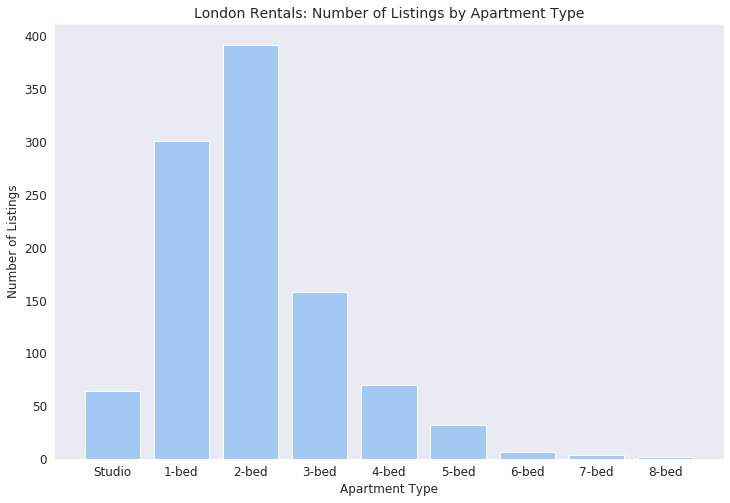

In [113]:
import seaborn as sns
def plot_by_type(rmd: RightmoveData):
    """Bar chart of count of results by number of bedrooms."""
    df = rmd.summary()
    labels = [f"{i}-bed" if i != 0 else "Studio" for i in df["number_bedrooms"]]
    x = df.index
    y = df["count"]
    sns.set_style("dark")
    sns.set_palette(sns.color_palette("pastel"))
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.title("London Rentals: Number of Listings by Apartment Type", size = 14)
    plt.xlabel("Apartment Type", size = 12)
    plt.ylabel("Number of Listings", size = 12)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.bar(x, y, tick_label=labels)
    plt.show()

plot_by_type(rmd)

As we can see, the __most frequent__ offers on the market are about __2 bedrooms apartments__ and __1 bedroom apartment__.  
  
*Where are the most offers located by postcode?*  
We can plot a new __bar chart to explore the distribution of offers by postcode__.

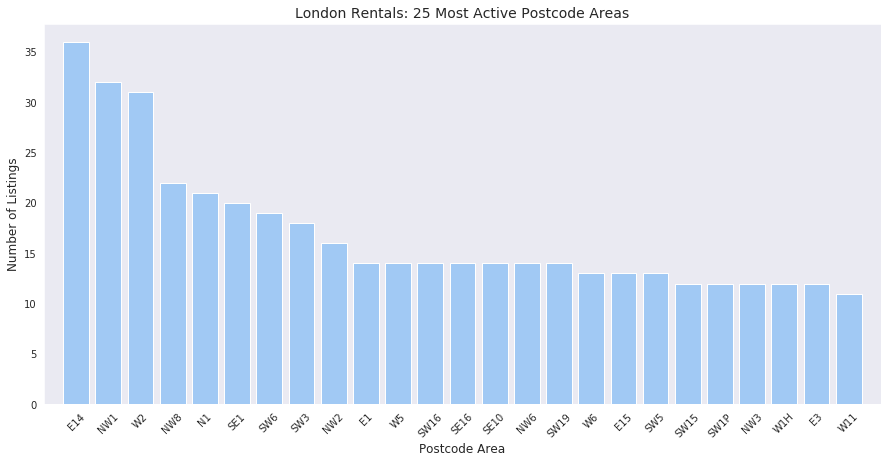

In [111]:
def plot_by_postcode(rmd: RightmoveData, number_to_plot: int = 25):
    """Plot count of results by postcode."""
    df = rmd.summary("postcode")
    df.sort_values(by="count", ascending=False, inplace=True)
    df = df.reset_index(drop=True)[:number_to_plot]
    x, y = df["postcode"], df["count"]
    ymax = ((df["count"].max() // 5) + 1) * 5
    sns.set_palette(sns.color_palette("pastel"))
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.bar(x.index, height=y)
    ax.set_title(f"London Rentals: {number_to_plot} Most Active Postcode Areas", size=14)
    ax.set_xlabel("Postcode Area", size=12)
    ax.set_ylabel("Number of Listings", size=12)
    ax.set_xticks(x.index)
    ax.set_xlim(-1, x.index[-1]+1)
    ax.set_xticklabels(x.values, rotation=45)
    ax.set_yticks(range(0, ymax, 5))
    return fig

f = plot_by_postcode(rmd, number_to_plot=25)

<a id='item7'></a>

## Data Manipulation

In order to make the results easier to read and interpret, I decided to __join each postcode to the District Name__.  
This step is of __primary importance to make the results enjoyable to the final user__.  
  
First of all __I scraped the Wikipedia Table__ using __Beautiful Soup 4__ and I saved the result as a CSV.
To make this Jupyter Notebook shorter, *I'll not include the code used to scrape the table* but I'm going to __open the CSV file as a DataFrame__ and work directly on it.

In [10]:
# Open the csv file and save it as a Pandas DataFrame
df_districts = pd.read_csv("London Districts.csv")

In [11]:
#df_rm = pd.DataFrame(df_rm)

In [12]:
# Rename the column "postcode" to match the column name of the df_districts
df_rm.rename(columns = {"postcode":"PostCode"}, inplace=True)

In [13]:
df_rm.shape

(1050, 8)

To define the location of each District, we are going to define latitude and longitude them using OpenCageData.

In [15]:
# Extract the postcode column to process it through OpenCageData to find latitude and longitude of each postcode
postal_codes = df_districts["PostCode"]

Use the list of Postcodes to expand the DataFrame with the latitude and longitude location.

In [16]:
import json

latitudes = [] # Initializing the latitude array
longitudes = [] # Initializing the longitude array

for postal_code in postal_codes : 
    place_name = postal_code + " London" # Formats the place name
    url = 'https://api.opencagedata.com/geocode/v1/json?q={}&key={}'.format(place_name, "REPLACE WITH YOUR PERSONAL CODE") # Gets the proper url to make the API call
    obj = json.loads(requests.get(url).text) # Loads the JSON file in the form of a python dictionary
    
    results = obj['results'] # Extracts the results information out of the JSON file
    lat = results[0]['geometry']['lat'] # Extracts the latitude value
    lng = results[0]['geometry']['lng'] # Extracts the longitude value
    
    latitudes.append(lat) # Appending to the list of latitudes
    longitudes.append(lng) # Appending to the list of longitudes

In [17]:
df_districts['Latitude'] = latitudes
df_districts['Longitude'] = longitudes
df_districts.head()

,PostCode,District Name,Latitude,Longitude
0,E1,Eastern Head district,51.489334,-0.144055
1,E2,Bethnal Green,51.489334,-0.144055
2,E3,Bow,51.514947,-0.093046
3,E4,Chingford,51.507322,-0.127647
4,E5,Clapton,51.514947,-0.093046


Having the latitude and longitude of each district could be useful for future and more in-depth analysis.

However, for this project, it is essential to expand our database by __associating each apartment with its geographical coordinates__.

In [18]:
df_rm_lat_long = df_rm
df_rm_address = df_rm_lat_long["address"]

In [19]:
# Set the OpenCageGeocode requirements:
key = 'REPLACE WITH YOUR PERSONAL KEY'
geocoder = OpenCageGeocode(key)

In [20]:
# Create a new empty dataframe with the columns that are important for our purpose
df_info = pd.DataFrame(columns = ["i", "address", "Latitude_a", "Longitude_a", "county", "Postcode_complete", "state_district", "suburb"])

In [21]:
# Define some empty list
lat_list = []
lng_list = []
county_list = []
postcode_complete_list = []
state_district_list = []
suburb_list = []
address_list = []

# Create a loop to find and store the data for each address.
for i in range(0, len(df_rm["address"])):
    address = df_rm["address"][i]
    query = u'{}'.format(address)
    results = geocoder.geocode(query)

    # In order to avoid errors, define an if-else statement to insert 'np.nan' when the 'results' variable is blank or some of the results are missing
    if not results:
        address_ = df_rm["address"][i]
        lat_ = np.nan
        lng_ = np.nan
        county_ = np.nan
        postcode_complete = np.nan
        state_district = np.nan
        suburb = np.nan
    
    else:
        address_ = df_rm["address"][i]

        if 'lat' in results[0]['geometry']:
            lat_ = results[0]['geometry']['lat']
        else:
            lat_ = np.nan

        if 'lng' in results[0]['geometry']:
            lng_ = results[0]['geometry']['lng']
        else:
            lng_ = np.nan

        if 'county' in results[0]['components']:
            county_ = results[0]['components']['county']
        else:
            county_ = np.nan

        if 'postcode' in results[0]['components']:
            postcode_complete = results[0]['components']['postcode']
        else:
            postcode_complete = np.nan

        if 'state_district' in results[0]['components']:
            state_district = results[0]['components']['state_district']
        else:
            state_district = np.nan

        if 'suburb' in results[0]['components']:
            suburb = results[0]['components']['suburb']
        else:
            suburb = np.nan

        lat_list.append(lat_)
        lng_list.append(lng_)
        county_list.append(county_)
        postcode_complete_list.append(postcode_complete)
        state_district_list.append(state_district)
        suburb_list.append(suburb)
        address_list.append(address_)
        
        #(columns = ["i", "address", "Latitude_a", "Longitude_a", "county", "Postcode_complete", "state_district", "suburb"])
        df_info = df_info.append(pd.Series([i, address_, lat_, lng_, county_, postcode_complete, state_district, suburb], index=df_info.columns), ignore_index = True)

In [22]:
print(df_info.shape)
df_info.head(3)

(1038, 8)


,i,address,Latitude_a,Longitude_a,county,Postcode_complete,state_district,suburb
0,0,"Drayton Gardens, Chelsea, London, SW10",51.488547,-0.181068,Royal Borough of Kensington and Chelsea,SW10,Greater London,Brompton
1,1,"Earls Court , London, SW5",51.491612,-0.193903,Royal Borough of Kensington and Chelsea,SW5 9LY,Greater London,Earl's Court
2,2,"Blackheath Road, London, SE10",51.474230,-0.021016,Royal Borough of Greenwich,SE10 8GA,Greater London,NaN


As you can see 13 flats are missing. It normally happens when the address is not correctly defined.  
  
In order to properly match the new DataFrame to the original set of data, I defined the column "i" that is equal to the index values of each record from the original DataSet. 

In [23]:
df_info = df_info.set_index('i')

Now we need to __merge the dataframes__. I'll merge the *df_districts and df_rm on Postcode*. In this way I'll have a match between postcode and district name.  
  
Then I'll merge the *df_merged with the new df_info*.  
In this way I'll have available for each flat on the market as many location information as possible.  
  
__*I'll drop the "state district" column because it doesn't add any further information*__.

In [24]:
df_merged = df_rm.merge(df_districts, how='left', on="PostCode")

In [25]:
print(df_merged.shape)
df_merged.head(3)

(1050, 11)


,price,type,address,url,agent_url,PostCode,number_bedrooms,search_date,District Name,Latitude,Longitude
0,35750.0,6 bedroom house,"Drayton Gardens, Chelsea, London, SW10",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,SW10,6.0,2019-12-02 08:07:12.688155,West Brompton,51.489334,-0.144055
1,2881.0,2 bedroom apartment,"Earls Court , London, SW5",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,SW5,2.0,2019-12-02 08:07:12.688155,Earls Court,51.489334,-0.144055
2,1250.0,1 bedroom flat,"Blackheath Road, London, SE10",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,SE10,1.0,2019-12-02 08:07:12.688155,Greenwich,51.514947,-0.093046


In [26]:
# I realized that i need the columns "i" from the df_info and the column "index" from the df_merged. 
df_merged = df_merged.reset_index()
df_merged.rename(columns = {"index" : "i"}, inplace = True)
df_info = df_info.reset_index()

In [27]:
# Just to be sure, I'll save a copy of the datasets
df_merged_copy = df_merged
df_info_copy = df_info

In [28]:
df_location = df_merged_copy.merge(df_info_copy, how='outer', on=["i"])

In [29]:
print(df_location.shape)
df_location.tail(3)

(1050, 19)


,i,price,type,address_x,url,agent_url,PostCode,number_bedrooms,search_date,District Name,Latitude,Longitude,address_y,Latitude_a,Longitude_a,county,Postcode_complete,state_district,suburb
1047,1047,2900.0,2 bedroom apartment,"Gordon Road, Nunhead, London, SE15",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,SE15,2.0,2019-12-02 08:07:12.688155,Peckham,51.489334,-0.144055,"Gordon Road, Nunhead, London, SE15",51.466406,-0.059737,London Borough of Southwark,SE15 3RW,Greater London,Nunhead
1048,1048,2600.0,2 bedroom flat,"Boardwalk Place, E14",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,E14,2.0,2019-12-02 08:07:12.688155,Poplar,51.514947,-0.093046,"Boardwalk Place, E14",51.505514,-0.010015,London Borough of Tower Hamlets,NaN,Greater London,Blackwall
1049,1049,3640.0,4 bedroom apartment,"Melcombe Street, Marylebone, London, NW1",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,NW1,4.0,2019-12-02 08:07:12.688155,Head district,51.489334,-0.144055,"Melcombe Street, Marylebone, London, NW1",51.522726,-0.159938,Westminster,NW1 6AH,Greater London,Marylebone


As you can see, now we have the original DataFrame expanded.  
  
What we have added:  
  
 - __District Name__
 - __Latitude__ *and* __Longitude__: lat and lng of the "District Name"
 - __Address_y__: a copy of the original address that we'll drop. I used it to be sure that the DataFrames have been merged correctly
 - __Latitude_a__ *and* __Longitude_a__: lat and lng of the flat.
 - __County__
 - __Postcode_complete__: an extension of the original PostCode
 - __State_district__
 - __suburb__
  


<a id='item8'></a>

## Foursquare API - Find the most common venues near the flat

### Collect meaningful information about the most common venues around each flat.  
  
This step is crucial to develop a good __clustering K-Means model__.  
  
We are going to use the __Foursquare API__ to collect the __first 100 venues__ in a __radius of 500 meters around each flat posted on RightMove__.  

In [30]:
# Take a copy of the dataset to be sure we don't lose any data
df_clustering = df_location

As we can see, there are a total of 1050 records in our dataset and 953 unique address.

In [31]:
df_clustering.T.apply(lambda x: x.nunique(), axis=1)

i                    1050
price                 351
type                   80
address_x             957
url                  1042
agent_url             556
PostCode              136
number_bedrooms         9
search_date             1
District Name         105
Latitude               26
Longitude              26
address_y             947
Latitude_a            750
Longitude_a           748
county                 67
Postcode_complete     638
state_district          7
suburb                222
dtype: int64

To be sure that the code run smoothly during the analysis, is better to __drop__ all the __rows that have a Null value__ in one of the columns __"Latitude_a" or "Longitude_a" or both__.

In [32]:
# Drop rows with Longitude_a or Latitude_a = np.nan
df_clustering.dropna(subset=['Latitude_a', 'Longitude_a'], inplace=True)
print(df_clustering.shape)
df_clustering.rename(columns={"level_0" : "i-match"}, inplace=True)
df_clustering.reset_index()
df_clustering.head(3)

#Note: I'm saving the columns level_0, i, i_match, address_x and address_y to have a way to double-check all the data manipulation. After I'm sure that everything is correct, I'll drop them.

(1038, 19)


,i,price,type,address_x,url,agent_url,PostCode,number_bedrooms,search_date,District Name,Latitude,Longitude,address_y,Latitude_a,Longitude_a,county,Postcode_complete,state_district,suburb
0,0,35750.0,6 bedroom house,"Drayton Gardens, Chelsea, London, SW10",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,SW10,6.0,2019-12-02 08:07:12.688155,West Brompton,51.489334,-0.144055,"Drayton Gardens, Chelsea, London, SW10",51.488547,-0.181068,Royal Borough of Kensington and Chelsea,SW10,Greater London,Brompton
1,1,2881.0,2 bedroom apartment,"Earls Court , London, SW5",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,SW5,2.0,2019-12-02 08:07:12.688155,Earls Court,51.489334,-0.144055,"Earls Court , London, SW5",51.491612,-0.193903,Royal Borough of Kensington and Chelsea,SW5 9LY,Greater London,Earl's Court
2,2,1250.0,1 bedroom flat,"Blackheath Road, London, SE10",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,SE10,1.0,2019-12-02 08:07:12.688155,Greenwich,51.514947,-0.093046,"Blackheath Road, London, SE10",51.474230,-0.021016,Royal Borough of Greenwich,SE10 8GA,Greater London,NaN


Now it's time to define the setting variables for __the Foursquare API__ in order to __collect the information__ we need to develop a __clustering analysis__.

In [ ]:
CLIENT_ID = 'REPLACE WITH YOUR CLIENT ID' # your Foursquare ID
CLIENT_SECRET = 'REPLACE WITH YOUR SECRET KEY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [34]:
def getNearbyVenues(names, latitudes, longitudes, i, price, types, radius = 500, LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng, i, price, types in zip(names, latitudes, longitudes, i, price, types):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        if (lat != np.nan) and (lng != np.nan):
            
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng,
                i,
                price,
                types,
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

            nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
            nearby_venues.columns = ['address_x', 
                                      'address Latitude', 
                                      'address Longitude',
                                      'i',
                                      'price',
                                      'type',
                                      'Venue', 
                                      'Venue Latitude', 
                                      'Venue Longitude', 
                                      'Venue Category']
        else:
            continue
    
    return(nearby_venues)

This step sometimes need to be run again and again. For some reasons it doesn't run smoothly at the first go. 

In [35]:
df_address_venues = getNearbyVenues(names = df_clustering['address_x'],
                                   latitudes = df_clustering['Latitude_a'],
                                   longitudes = df_clustering['Longitude_a'],
                                   i = df_clustering['i'],
                                   price = df_clustering['price'],
                                   types = df_clustering['type']
                                  )

Drayton Gardens, Chelsea, London, SW10
Earls Court , London, SW5
Blackheath Road, London, SE10
St. Annes Street, Canary Wharf ,E14
Notting Hill Gate, Notting Hill, W11
Stapleton Hall Road, London, N4
Thorpedale Road, London, N4
Abbey House, Garden Road, London, NW8
White City Living, Lincoln Apartments, Fountain Park Way, White City, W12
Hither Farm Road Blackheath SE3
Page Street, London, SW1P
Reynolds House, London, E2
Burghley Road, London, N8
Penwith Road, London, SW18
Holland Park Avenue, Holland Park, London, W11
Flat 13, 26 Dennington Park Road
Wade House, London, SE1
Tyrrell Road, East Dulwich, London, SE22
Rodwell Road, East Dulwich, London, SE22
Flat 9, 26 Dennington Park Road
Thicket Road, London, SE20
Kingsley House, London, SW3
Flat 20 Pavillion Court
Flat 19 Pavillion Court
Spa Road, London, SE16
Newby Street, Battersea, SW8
Principal Tower, London, EC2A
Mysore Rd., London, SW11
Holmside Road, London, SW12
Sun Passage, London, SE16
Angel Wharf, 164 Shepherdess Walk, Londo

In [36]:
#df_clustering.loc[df_clustering['address_x'] == 'Munster Road, Fulham']

In [37]:
#df_clustering.loc[192]

Now that we have collected data about each flat let's check how many venues we have found by address

In [38]:
df_address_venues.groupby(['address_x', 'i', 'price', 'type']).count().head(3)

,,,,address Latitude,address Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
address_x,i,price,type,,,,,,
"Latitude House, Oval Road, Camden, NW1",186,3445.0,2 bedroom apartment,93,93,93,93,93,93
"Reminder Lane, North Greenwich, SE10",928,3000.0,2 bedroom flat,13,13,13,13,13,13
"Walton Street, Chelsea, SW3",44,6000.0,4 bedroom terraced house,100,100,100,100,100,100


In [39]:
print("There are " , len(df_address_venues["Venue Category"].unique()), " unique categories in the dataset")

There are  425  unique categories in the dataset


To be clear, I first get dummies and then reorganize the columns order

In [40]:
# one hot encoding
df_venues_dummies = pd.get_dummies(df_address_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
df_venues_dummies['address'] = df_address_venues['address_x']
df_venues_dummies['i'] = df_address_venues['i']
df_venues_dummies['price'] = df_address_venues['price']
df_venues_dummies['type'] = df_address_venues['type']

# move address column to the first column
temp_address = df_venues_dummies['address']
df_venues_dummies.drop(labels=['address'], axis=1,inplace = True)
df_venues_dummies.insert(0, 'address', temp_address)

# move i column to the second column
temp_i = df_venues_dummies['i']
df_venues_dummies.drop(labels=['i'], axis=1,inplace = True)
df_venues_dummies.insert(1, 'i', temp_i)

# move price column to the third column
temp_price = df_venues_dummies['price']
df_venues_dummies.drop(labels=['price'], axis=1,inplace = True)
df_venues_dummies.insert(2, 'price', temp_price)

# move type column to the fourth column
temp_type = df_venues_dummies['type']
df_venues_dummies.drop(labels=['type'], axis=1,inplace = True)
df_venues_dummies.insert(3, 'type', temp_type)

Now our dataset has the following shape:

In [41]:
df_venues_dummies.shape

(42728, 429)

Group the data by 'address', 'i', 'price' and 'type'

In [42]:
df_dcategories = df_venues_dummies.groupby(['address', 'i', 'price', 'type']).mean().reset_index()

In [43]:
df_dcategories.shape

(1017, 429)

And create a dataset with the 20 most common venues for each flat.

In [44]:
# Create a dataframe with the top 20 venues

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['address', 'i', 'price', 'type']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
address_venues_sorted = pd.DataFrame(columns=columns)
address_venues_sorted['address'] = df_dcategories['address']
address_venues_sorted['i'] = df_dcategories['i']
address_venues_sorted['price'] = df_dcategories['price']
address_venues_sorted['type'] = df_dcategories['type']

for ind in np.arange(df_dcategories.shape[0]):
    address_venues_sorted.iloc[ind, 4:] = return_most_common_venues(df_dcategories.iloc[ind, 3:], num_top_venues)

address_venues_sorted.head(3)

,address,i,price,type,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,"Latitude House, Oval Road, Camden, NW1",186,3445.0,2 bedroom apartment,Coffee Shop,Bar,Burger Joint,Music Venue,Pub,Vegetarian / Vegan Restaurant,Market,Record Shop,Tea Room,Supermarket,Sandwich Place,Cocktail Bar,Zoo Exhibit,Fish & Chips Shop,Flea Market,Greek Restaurant,Grocery Store,Japanese Restaurant,Ice Cream Shop,Pizza Place
1,"Reminder Lane, North Greenwich, SE10",928,3000.0,2 bedroom flat,Park,Spa,Waterfront,Harbor / Marina,Pub,Café,Convenience Store,Bus Stop,Asian Restaurant,Cable Car,Film Studio,Filipino Restaurant,Zoo Exhibit,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Factory,Fish & Chips Shop,Food
2,"Walton Street, Chelsea, SW3",44,6000.0,4 bedroom terraced house,Café,Italian Restaurant,Hotel,Coffee Shop,Middle Eastern Restaurant,Boutique,Garden,Pizza Place,Pub,Jewelry Store,Seafood Restaurant,Steakhouse,Cocktail Bar,Restaurant,Tea Room,Gourmet Shop,Gym / Fitness Center,French Restaurant,Japanese Restaurant,Lebanese Restaurant


In [46]:
address_venues_sorted.shape

(1017, 24)

In [47]:
i_values = address_venues_sorted['i']

<a id='item9'></a>

## Clustering using K-means

Now that we have all the information we need to divide the market by geographic similarity, it's time to split it in Clusters.  
  
We are going to use the __K-Means algorithm__ for this purpose.  
__K-Means__ clustering is a method of __vector quantization__, originally from signal processing, that is __popular for cluster analysis in data mining__. K-Means clustering aims __to partition n observations into k clusters__ in which __each observation belongs to the cluster with the nearest mean__, serving as a prototype of the cluster.

In [48]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

First I drop the columns that I don't need in order use the K-Means algorithm.

In [49]:
df_dcategories_nn = df_dcategories.drop(columns={'address', 'i', 'price', 'type'})
df_dcategories_nn.head(3)

,ATM,Accessories Store,Acupuncturist,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Betting Shop,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Caucasian Restaurant,Cemetery,Chaat Place,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Cigkofte Place,City Hall,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,College Quad,Comedy Club,Comic Shop,Community Center,Community College,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Country Dance Club,Coworking Space,Creperie,Cricket Ground,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Iraqi Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Kosher Restaurant,Lake,Laser Tag,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Gym,Outdoor Sculptur

I'm going to save the dataset as a CSV in case I need it in other applications.

In [50]:
df_dcategories_nn.to_csv(path_or_buf='df_dcategries_nn.csv')

There is not a right answer to the question: how many clusters I need?  
For this particular paper I decided to split the dataset in 20 clusters to be sure that small differences between two locations influence the cluster the flat belongs to.

In [51]:
k_clusters = 20

k_clusters_fit = KMeans(k_clusters, random_state = 4).fit(df_dcategories_nn)

In [52]:
# Extract the clusters labels
k_clusters_fit.labels_

array([13, 11, 13, ...,  7, 13,  7], dtype=int32)

In [53]:
# add clustering labels
# df.insert(loc, column_name, values)
address_venues_sorted.insert(0, "Cluster Label", k_clusters_fit.labels_)

In [54]:
# Create a copy of the DataFrame
df_final = df_clustering

df_final = df_final[df_final['i'].isin(i_values)]
df_final.shape

(1017, 19)

In [55]:
# Merge the DataFrames
df_final = df_final.merge(address_venues_sorted, how='outer', on=["i"])

# Convert Cluster Label in integers
df_final["Cluster Label"] = df_final["Cluster Label"].astype(int)

In [56]:
df_final.shape

(1017, 43)

In [57]:
df_final_clean = df_final.drop(columns= ['i', 'PostCode', 'search_date', 'address_y',  'state_district'])

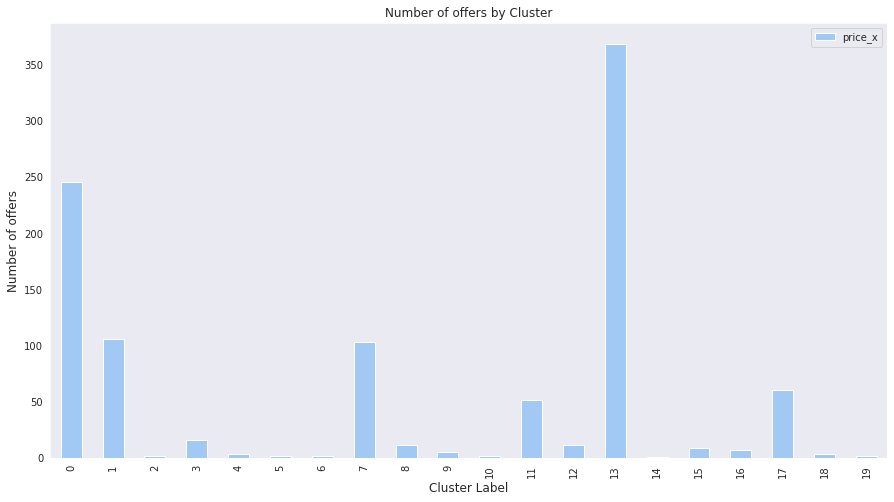

In [114]:
df_plot1 = df_final_clean.groupby(['Cluster Label']).count()

df_plot1.reset_index().plot(x="Cluster Label", y="price_x", kind="bar", figsize=(15,8))
plt.xlabel("Cluster Label", size = 12)
plt.ylabel("Number of offers", size = 12)
plt.title("Number of offers by Cluster")

plt.show()

I'll save the model externally. The reason of this is because initially I divided the Notebook in 4 different parts and files and I needed to import the trained model in a new Notebook.  
I left it in this final version as *"a good things to know how to do"*.

In [59]:
pickle.dump(k_clusters_fit, open("k_clusters_fit.pkl", "wb"))

<a id='item10'></a>

### London Clusters Distribution Map

In [61]:
# London latitude and longitude
latitude = 51.509865
longitude = -0.118092

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i + x + (i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_final_clean['Latitude_a'], df_final_clean['Longitude_a'], df_final_clean['address_x'], df_final_clean['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item11'></a>

### Housing market - heating map

In [62]:
def generateBaseMap(default_location=[latitude, longitude], default_zoom_start=8):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [63]:
from folium.plugins import HeatMap

base_map = generateBaseMap(default_zoom_start = 13)
HeatMap(data=df_final_clean[['Latitude_a', 'Longitude_a', 'price_x']].groupby(['Latitude_a', 'Longitude_a']).mean().reset_index().values.tolist(), radius=12, max_zoom=12).add_to(base_map)


In [64]:
base_map

Can I define a input variable asking a user to insert his address and make a prevision about the cluster?

In [65]:
df_final_clean.to_csv(path_or_buf = 'df_clusters_labeled.csv')

In [66]:
print(df_final_clean.groupby(['District Name']).head().shape)
df_final_grouped = df_final_clean.groupby(['District Name', 'type_x']).mean()
df_final_grouped.head(3)

(393, 38)


price_x  number_bedrooms  \
District Name type_x                                                     
Abbey Wood    2 bedroom flat                   1050.0              2.0   
              4 bedroom end of terrace house   1500.0              4.0   
Acton         1 bedroom flat                   1050.0              1.0   

                                               Latitude  Longitude  \
District Name type_x                                                 
Abbey Wood    2 bedroom flat                  51.478570   0.118010   
              4 bedroom end of terrace house  51.478570   0.118010   
Acton         1 bedroom flat                  51.507322  -0.127647   

                                              Latitude_a  Longitude_a  \
District Name type_x                                                    
Abbey Wood    2 bedroom flat                   51.486900     0.107500   
              4 bedroom end of terrace house   51.486900     0.107500   
Acton         1 bedroom flat                   51.503312    -0.277009   

                                              Cluster Label  price_y  
District Name type_x                                                  
Abbey Wood    2 bedroom flat                            1.0   1050.0  
              4 bedroom end of terrace house            1.0   1500.0  
Acton         1 bedroom flat                            7.0   1050.0

In [67]:
df_2bed = df_final_grouped.loc[df_final_grouped['number_bedrooms'] == 2].sort_values(by=['price_x'])
df_2bed.head()

,,price_x,number_bedrooms,Latitude,Longitude,Latitude_a,Longitude_a,Cluster Label,price_y
District Name,type_x,,,,,,,,
Abbey Wood,2 bedroom flat,1050.0,2.0,51.478570,0.118010,51.486900,0.107500,1.0,1050.0
Eltham,2 bedroom flat,1150.0,2.0,51.431313,0.033140,51.450747,0.061798,13.0,1150.0
New Southgate,2 bedroom apartment,1200.0,2.0,42.988576,-81.246643,51.618535,-0.148903,17.0,1200.0
East Ham,2 bedroom apartment,1235.0,2.0,42.988576,-81.246643,51.518840,0.058978,12.0,1235.0
Catford,2 bedroom flat,1250.0,2.0,51.439653,-0.011327,51.441781,0.003271,8.0,1250.0


In [68]:
clusters_grouped = df_final_clean.groupby(['Cluster Label', 'District Name', 'type_x']).mean()
clusters_grouped.loc[clusters_grouped['number_bedrooms'] == 2].sort_values(by=['price_x']).head(3)

,,,price_x,number_bedrooms,Latitude,Longitude,Latitude_a,Longitude_a,price_y
Cluster Label,District Name,type_x,,,,,,,
1,Abbey Wood,2 bedroom flat,1050.0,2.0,51.478570,0.118010,51.486900,0.107500,1050.0
13,Eltham,2 bedroom flat,1150.0,2.0,51.431313,0.033140,51.450747,0.061798,1150.0
17,New Southgate,2 bedroom apartment,1200.0,2.0,42.988576,-81.246643,51.618535,-0.148903,1200.0


In [69]:
df_studio_flat = clusters_grouped.reset_index()

In [70]:
df_studio_flat = df_studio_flat.loc[df_studio_flat['number_bedrooms'] == 0]

In [71]:
df_studio_flat = df_studio_flat.groupby(['District Name']).mean()

In [72]:
df_studio_flat = df_studio_flat.reset_index()
df_studio_flat.sort_values(by='price_x', inplace = True)

### Average price for a studio flat by district

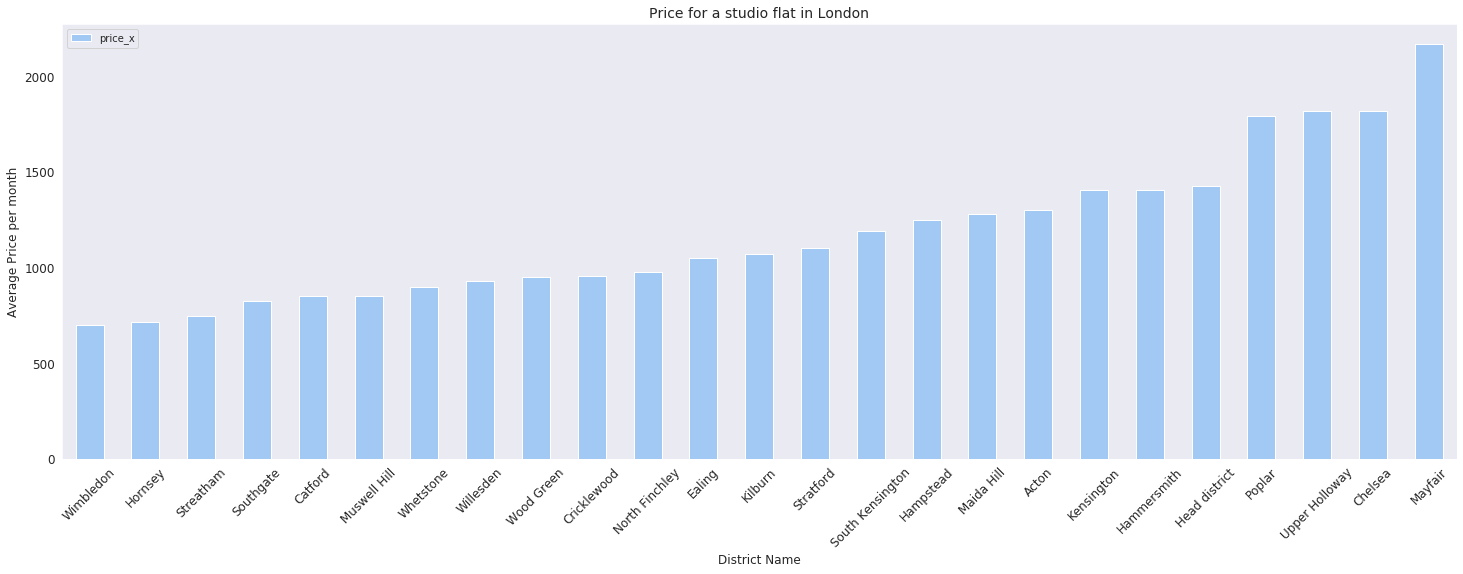

In [118]:
import matplotlib.pyplot as plt
df_studio_flat.plot('District Name', 'price_x', kind='bar', figsize=(25,8))

plt.xlabel('District Name', size = 12)
plt.ylabel("Average Price per month", size = 12)
plt.title("Price for a studio flat in London", size = 14)
plt.xticks(size = 12, rotation = 45)
plt.yticks(size = 12)

plt.show()

In [75]:
df_1bed = clusters_grouped.reset_index()

In [76]:
df_1bed = df_1bed.loc[df_1bed['number_bedrooms'] == 1]

In [77]:
df_1bed = df_1bed.groupby(['District Name']).mean()

In [78]:
df_1bed = df_1bed.reset_index()
df_1bed.sort_values(by='price_x', inplace = True)

### Average price for a 1 bedroom flat by district

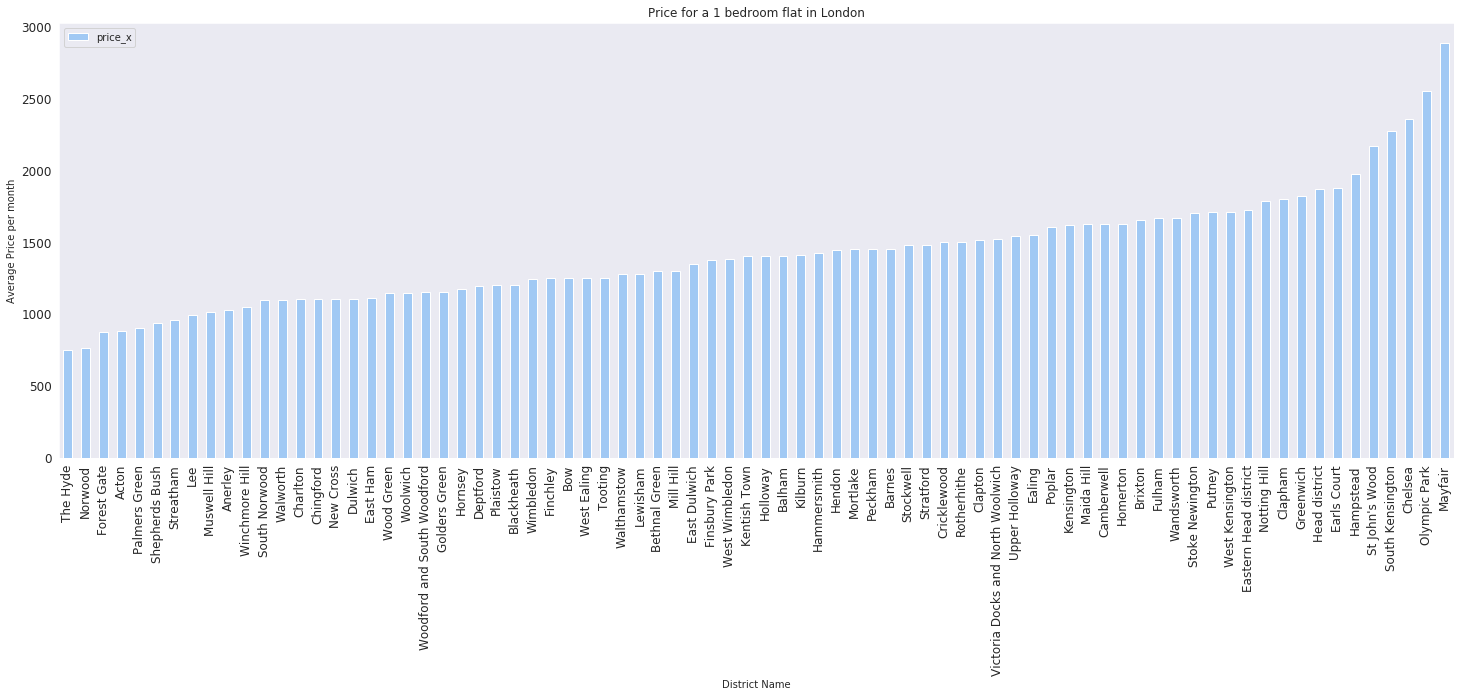

In [120]:
import matplotlib.pyplot as plt
df_1bed.plot('District Name', 'price_x', kind='bar', figsize=(25,8))

plt.xlabel('District Name')
plt.ylabel("Average Price per month")
plt.title("Price for a 1 bedroom flat in London")
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.show()

In [80]:
df_2bed = clusters_grouped.reset_index()

In [81]:
df_2bed = df_2bed.loc[df_2bed['number_bedrooms'] == 2]

In [82]:
df_2bed = df_2bed.groupby(['District Name']).mean()

In [83]:
df_2bed = df_2bed.reset_index()
df_2bed.sort_values(by='price_x', inplace = True)

### Average price for a 2 bedroom flat by district

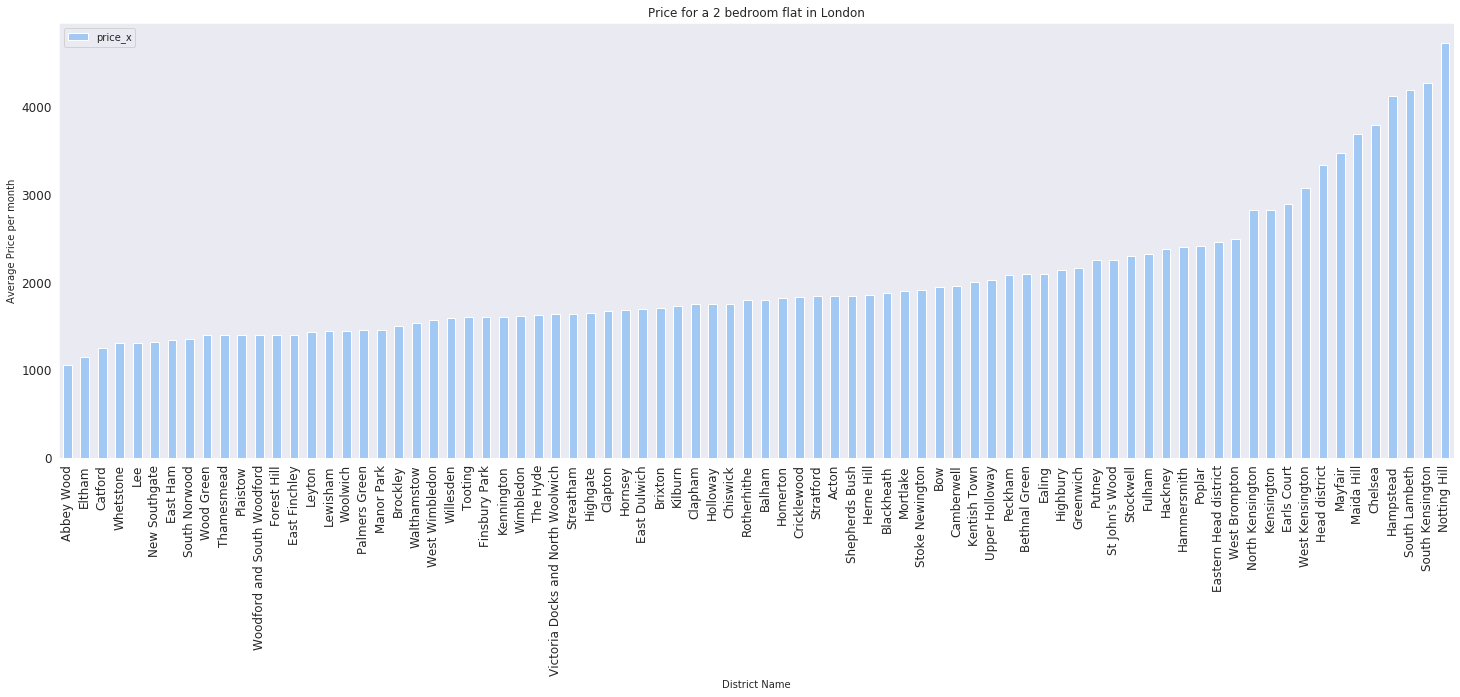

In [121]:
import matplotlib.pyplot as plt
df_2bed.plot('District Name', 'price_x', kind='bar', figsize=(25,8))

plt.xlabel('District Name')
plt.ylabel("Average Price per month")
plt.title("Price for a 2 bedroom flat in London")
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

### Amount of offers by cluster

Some of them are pretty unique.

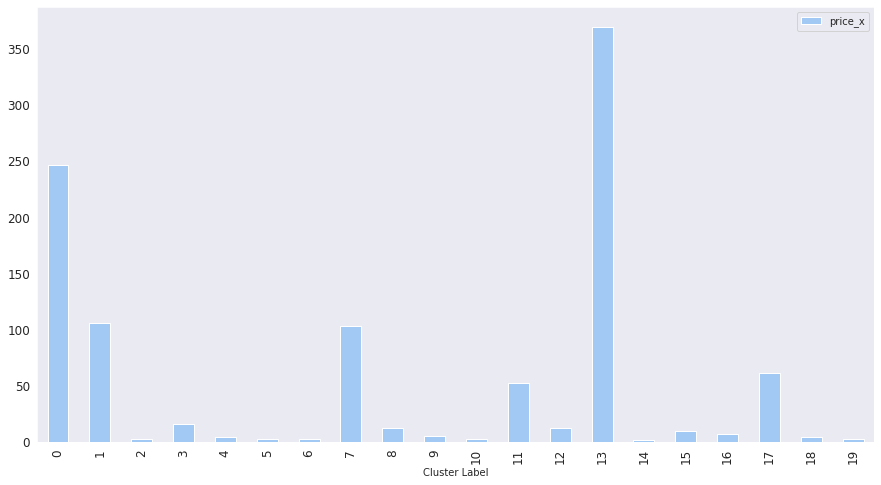

In [123]:
df_plot1 = df_final_clean.groupby(['Cluster Label']).count()

df_plot1.reset_index().plot(x="Cluster Label", y="price_x", kind="bar", figsize=(15,8))
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.show()

### Correlation matrix

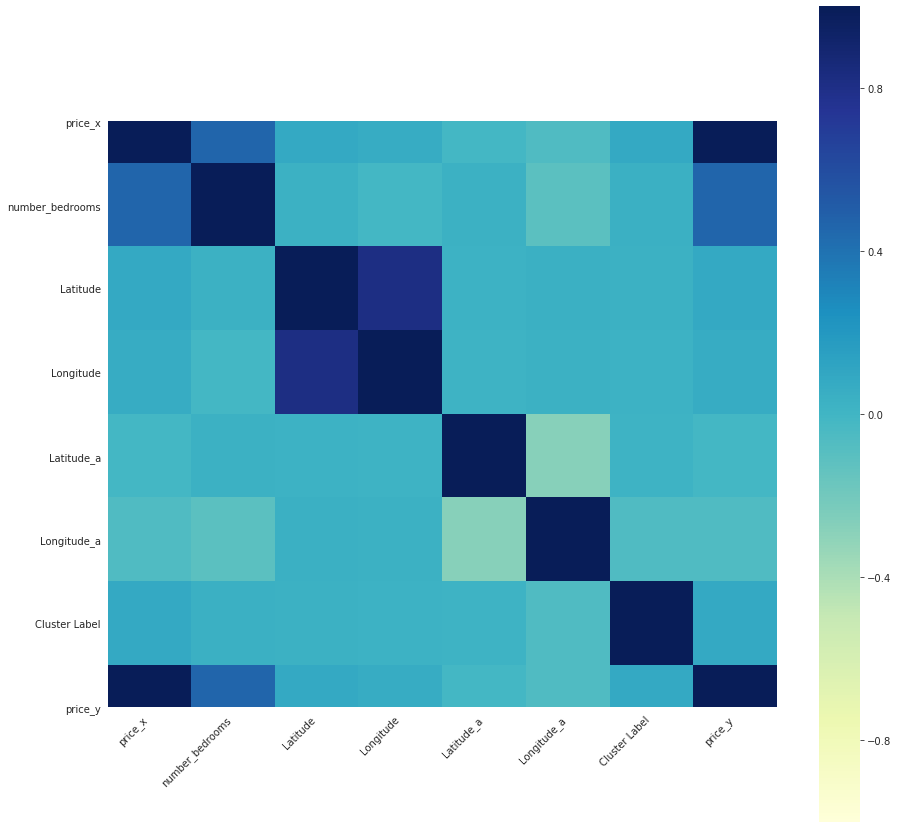

In [86]:
from matplotlib import pyplot

corr = df_final_clean.corr()

plt.figure(figsize=(15,15))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    cmap="YlGnBu",
    square=True
    
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


As expected, the only thing we can understand using the correlation matrix is that there is a correlation between price and the number of bedrooms.

<a id='item12'></a>

## The Final Input: find your best offer!

#### Find the flats available on the market with the neighbourhood you desire

As a starting point for this last section of the Notebook, we are going to load the K-Means model (it's necessary if it has been developed in a different Notebook), ask to the user to insert __a location__ he would love to live in, __the range of price__ and the __number of rooms__ he/she is looking for.  
  
With the data submitted by the user, we are going to __analyze the neighbor he/she is looking for__ and predict the cluster it belongs to.  
Based on these information, we can __provide a list of the best opportunities on the market__.

In [87]:
k_clusters_fit = pickle.load(open("k_clusters_fit.pkl", "rb"))
df_dcategories_nn = pd.read_csv('df_dcategries_nn.csv')

In [92]:
address = input('Insert your address')
bedroom = input('How many badrooms are you looking for?')
price = input("What's your budget?")

Insert your address 45 Park Lane, London, W1K 1PM
How many badrooms are you looking for? 2
What's your budget? 4000


Find the venues around the address as a sample using OpenCage Geocode.

In [93]:
key = 'REPLACE WITH YOUR PERSONAL KEY'
geocoder = OpenCageGeocode(key)

query = u'{}'.format(address)
results = geocoder.geocode(query)

latitude = results[0]['geometry']['lat']
longitude = results[0]['geometry']['lng']

print(u'%f;%f;%s;%s' % (results[0]['geometry']['lat'], 
                        results[0]['geometry']['lng'],
                        results[0]['components']['country_code'],
                        results[0]['annotations']['timezone']['name']))

51.512070;-0.157574;gb;Europe/London


In [94]:
df_your_location = pd.DataFrame(columns = ['address', 'latitude', 'longitude', 'number bedrooms'])
df_your_location = df_your_location.append(pd.Series([address, latitude, longitude, int(bedroom)], index=df_your_location.columns), ignore_index = True)

In [95]:
columns_list = df_dcategories_nn.columns
columns_list = columns_list.tolist()

Set up the FourSquare Key to collect the data we need about the address.

In [ ]:
CLIENT_ID = 'B5KWWDFHTON23TDXFR2TXATYBJQMYXICEEJWOSTX2YIAUZIC' # your Foursquare ID
CLIENT_SECRET = 'FVZXWADC3JUKZKIMRC40LFNTRSHC51MDTVKWHF4IJMGXTDC5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [97]:
def getNearbyVenuesExp(names, latitudes, longitudes, bedrooms, radius = 500, LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng, bedroom in zip(names, latitudes, longitudes, bedrooms):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        if (lat != np.nan) and (lng != np.nan):
            
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng,
                bedroom,
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

            nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
            nearby_venues.columns = ['address', 
                                      'latitude', 
                                      'longitude',
                                      'bedroom',
                                      'Venue', 
                                      'Venue Latitude', 
                                      'Venue Longitude', 
                                      'Venue Category']
        else:
            continue
    
    return(nearby_venues)

In [98]:
df_address_venues = getNearbyVenuesExp(names = df_your_location['address'],
                                   latitudes = df_your_location['latitude'],
                                   longitudes = df_your_location['longitude'],
                                   bedrooms = df_your_location['number bedrooms']
                                  )

45 Park Lane, London, W1K 1PM


In [99]:
df_address_venues.groupby(['address', 'bedroom']).count()

,,latitude,longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
address,bedroom,,,,,,
"45 Park Lane, London, W1K 1PM",2,100,100,100,100,100,100


In [101]:
# one hot encoding
df_venues_dummies = pd.get_dummies(df_address_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
df_venues_dummies['address'] = df_address_venues['address']
df_venues_dummies['bedroom'] = df_address_venues['bedroom']

# move address column to the first column
temp_address = df_venues_dummies['address']
df_venues_dummies.drop(labels=['address'], axis=1,inplace = True)
df_venues_dummies.insert(0, 'address', temp_address)

# move bedroom column to the second column
temp_i = df_venues_dummies['bedroom']
df_venues_dummies.drop(labels=['bedroom'], axis=1,inplace = True)
df_venues_dummies.insert(1, 'bedroom', temp_i)


df_dcategories = df_venues_dummies.groupby(['address', 'bedroom']).mean().reset_index()
df_dcategories.head()

,address,bedroom,Accessories Store,American Restaurant,Bakery,Bar,Boutique,Café,Clothing Store,Club House,Coffee Shop,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Fish & Chips Shop,Food Court,French Restaurant,Garden,Gastropub,Gym / Fitness Center,Health Food Store,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lounge,Memorial Site,Middle Eastern Restaurant,Modern European Restaurant,Monument / Landmark,Pakistani Restaurant,Park,Pub,Restaurant,Salad Place,Sandwich Place,Shoe Store,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Steakhouse,Tea Room,Turkish Restaurant,Wine Bar,Women's Store
0,"45 Park Lane, London, W1K 1PM",2,0.01,0.02,0.03,0.01,0.02,0.05,0.04,0.01,0.05,0.01,0.01,0.01,0.02,0.02,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.13,0.05,0.02,0.01,0.05,0.01,0.01,0.01,0.01,0.01,0.03,0.01,0.01,0.01,0.02,0.01,0.05,0.01,0.02,0.01,0.01,0.01,0.02,0.02,0.02,0.01,0.01,0.01


In [102]:
# Create a dataframe with the top 20 venues

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [103]:
num_top_venues = 20

if num_top_venues <= (len(df_dcategories.columns) - 2):
    num_top_venues = num_top_venues
else:
    num_top_venues = (len(df_dcategories.columns) - 2)

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['address', 'bedroom']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
address_venues_sorted = pd.DataFrame(columns=columns)
address_venues_sorted['address'] = df_dcategories['address']
address_venues_sorted['bedroom'] = df_dcategories['bedroom']

for ind in np.arange(df_dcategories.shape[0]):
    address_venues_sorted.iloc[ind, 2:] = return_most_common_venues(df_dcategories.iloc[ind, 1:], num_top_venues)

address_venues_sorted.head()

,address,bedroom,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,"45 Park Lane, London, W1K 1PM",2,Hotel,Coffee Shop,Hotel Bar,Italian Restaurant,Café,Restaurant,Clothing Store,Bakery,Middle Eastern Restaurant,Park,French Restaurant,Department Store,Deli / Bodega,Ice Cream Shop,Sandwich Place,Boutique,Sporting Goods Shop,Steakhouse,Tea Room,American Restaurant


In [104]:
df_prediction = df_dcategories.drop(columns = ['address', 'bedroom'])

In order to predict the cluster the address belongs to, we need to have the same number of features.  
The following code take the list of columns of the dataset used to train the K-Means algorithm and update the records using the values we collected in relation of the address that the user has submitted.

In [105]:
df_col = {}

for col in columns_list[1:]:
    df_col[col] = 0
    
df_columns_df = pd.DataFrame.from_dict(df_col, orient = 'index')
df_columns_df = df_columns_df.transpose()

df_columns_df.update(df_prediction)
df_columns_df

,ATM,Accessories Store,Acupuncturist,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Betting Shop,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Caucasian Restaurant,Cemetery,Chaat Place,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Cigkofte Place,City Hall,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,College Quad,Comedy Club,Comic Shop,Community Center,Community College,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Country Dance Club,Coworking Space,Creperie,Cricket Ground,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Iraqi Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Kosher Restaurant,Lake,Laser Tag,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Gym,Outdoor Sculptur

Now we can finally predict the cluster!

In [106]:
cluster_target = k_clusters_fit.predict(df_columns_df)[0]

In [107]:
cluster_target

7

And show a list of offers based on geographical preferences of the user.

In [108]:
df_final_clean.head(2)

,price_x,type_x,address_x,url,agent_url,number_bedrooms,District Name,Latitude,Longitude,Latitude_a,Longitude_a,county,Postcode_complete,suburb,Cluster Label,address,price_y,type_y,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,35750.0,6 bedroom house,"Drayton Gardens, Chelsea, London, SW10",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,6.0,West Brompton,51.489334,-0.144055,51.488547,-0.181068,Royal Borough of Kensington and Chelsea,SW10,Brompton,13,"Drayton Gardens, Chelsea, London, SW10",35750.0,6 bedroom house,Pub,French Restaurant,Italian Restaurant,Hotel,Bakery,Tapas Restaurant,Diner,Bagel Shop,Gastropub,Sandwich Place,Cocktail Bar,Steakhouse,Gym / Fitness Center,Bookstore,Pizza Place,Plaza,Dessert Shop,Restaurant,Juice Bar,Grilled Meat Restaurant
1,2881.0,2 bedroom apartment,"Earls Court , London, SW5",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,2.0,Earls Court,51.489334,-0.144055,51.491612,-0.193903,Royal Borough of Kensington and Chelsea,SW5 9LY,Earl's Court,7,"Earls Court , London, SW5",2881.0,2 bedroom apartment,Hotel,Café,Garden,Italian Restaurant,Coffee Shop,Chinese Restaurant,Pizza Place,Lebanese Restaurant,Historic Site,Grocery Store,Pub,Thai Restaurant,Cocktail Bar,Restaurant,Breakfast Spot,Farmers Market,Fast Food Restaurant,Pilates Studio,Park,Cupcake Shop


In [109]:
df_final_clean[
    (df_final_clean.number_bedrooms == float(bedroom))
    & (df_final_clean['Cluster Label'] == cluster_target)
    & (df_final_clean.price_x <= float(price))
].sort_values(by='price_x', ascending = True).drop(columns=["District Name", "Latitude", "Longitude", "address", "price_y", "type_y"])

,price_x,type_x,address_x,url,agent_url,number_bedrooms,Latitude_a,Longitude_a,county,Postcode_complete,suburb,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
128,1300.0,2 bedroom flat,Rochdale Road - Walthamstow - E17,http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,2.0,51.572498,-0.022421,London Borough of Waltham Forest,E17,Leyton,7,Fish & Chips Shop,Restaurant,Grocery Store,Hotel,Zoo Exhibit,Exhibit,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Fish Market,Event Service,Flea Market,Flower Shop,Food,Food & Drink Shop
477,1350.0,2 bedroom flat,"South Vale, London",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,2.0,51.559948,-0.336845,London Borough of Harrow,HA1 3PJ,Sudbury Hill,7,Train Station,Hotel,Cosmetics Shop,Sports Club,Grocery Store,Exhibit,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Event Service,Flea Market,Flower Shop,Food
730,1350.0,2 bedroom maisonette,"Connell Crescent, London, W5",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,2.0,51.528168,-0.288648,London Borough of Ealing,W5,NaN,7,Hotel,Shop & Service,Metro Station,Mediterranean Restaurant,Clothing Store,English Restaurant,Restaurant,Bar,Italian Restaurant,Park,Fabric Shop,Factory,Filipino Restaurant,Falafel Restaurant,Farm,Farmers Market,Exhibit,Fast Food Restaurant,Zoo Exhibit,Film Studio
788,1400.0,2 bedroom apartment,"Bowes Lyon Hall, LONDON, E16",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,2.0,51.504967,0.021259,London Borough of Newham,E16 1UR,Silvertown,7,Hotel,Café,Light Rail Station,Bakery,Sandwich Place,Bar,Harbor / Marina,Cable Car,Scenic Lookout,Gym / Fitness Center,Gym,Grocery Store,Thai Restaurant,Science Museum,Boat or Ferry,Chinese Restaurant,Steakhouse,Gas Station,Bridge,English Restaurant
837,1400.0,2 bedroom flat,"Helmsley, Cleveland Road, E18",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,2.0,54.246990,-1.064502,North Yorkshire,YO62 5AT,Helmsley,7,Hotel,Coffee Shop,Grocery Store,Pub,Historic Site,Gourmet Shop,Bookstore,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Zoo Exhibit,Exhibit,Flea Market,Flower Shop
207,1550.0,2 bedroom flat,"Metro Building, 148 Major Road, London, E15",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,2.0,51.533300,0.000000,NaN,E15,NaN,7,Light Rail Station,Hotel,Trail,Food & Drink Shop,Grocery Store,Café,Thai Restaurant,Fish & Chips Shop,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Fish Market,Event Space,Flea Market,Flower Shop
720,1650.0,2 bedroom apartment,"Azura Court, Stratford, London",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,2.0,51.536725,-0.007755,London Borough of Newham,E15 2JU,Stratford Marsh,7,Gym,Café,Hotel,Event Space,Gym / Fitness Center,Grocery Store,Thai Restaurant,Outdoor Sculpture,Pool,Bar,Garden,Pub,Bus Stop,Restaurant,Food,Farmers Market,Food Stand,Food Service,Factory,Falafel Restaurant
667,1700.0,2 bedroom flat,"Greystoke House, Brunswick Road, Ealing, Londo...",http://www.rightmove.co.uk/property-to-re

---

<a id='item13'></a>

## Conclusion

In this project, we went through the identification of a business problem and the data we need to collect in order to solve it.
In the first section of the paper, we focus on collecting the data we need. 
In the second section we focuse on data cleaning and we expand the dataset using multiple sources and API. 
After that, we developed a machine learning model to divide the market into 20 clusters by geographical similarity.

The last section is dedicated to the user, allowing him to input the address of a street where he would like to live, the number of bedrooms he needs and the price range.
This allows each user to identify the cluster that best suits their needs and empower people to filter an huge amount of data quickly.

Developing this project had been a great experiance and gave me a lot of insight of how the project could be expanded to define when a flat is overpriced or underpriced.
We could also study the real estate value based on criminality rate, location, geographical information and so on.

---

<h1 style="text-align:center;">Thank You!</h1>

---

<h2 style="text-align:left;"><img src="download.png" height="75" width="75">   Federico Sciuca</h2>
<h4 style="text-align:left;"><a href="https://www.linkedin.com/in/federico-sciuca/"><img src="https://cdn2.iconfinder.com/data/icons/popular-social-media-flat/48/Popular_Social_Media-22-512.png" style="text-align:left; position: relative; top: 15px; left: 1px;" height="45" width="45">   Contact me on LinkedIn</a></h4>

---